In [1]:
import pandas as pd
import spotipy
import spotipy.util as util
import re
import collections
from collections import Counter

In [2]:
user_id = '31tnh4dpeuphy4evlem6vvr2bqdq'
playlist_id = '5EQrmGSAtksHmmlXLgKguq?si=9779d603be8a4eb9'
client_id = 'ce4b2187a6874e29b07bc528bc524153'
client_secret= '8b1376b892164c9cad7af967c8c8515e'

In [3]:
token = util.prompt_for_user_token(user_id,
                                   'playlist-read-collaborative',
                                   client_id=client_id,
                                   client_secret=client_secret,
                                   redirect_uri='http://localhost:8000/')

In [4]:
sp = spotipy.Spotify(auth=token)

In [5]:
top_200 = pd.read_csv('top_200.csv')

In [6]:
artist_name = []
album_id = []
album_name = []
track_name = []
popularity = []
track_id = []
track_uri = []
date_release = []
track_ids_list = list(top_200['track_id'])
for i in range(0,len(track_ids_list),50):
    data = track_ids_list[i:i + 50]
    tracks_df = sp.tracks(data)
    for idx, track in enumerate(tracks_df['tracks']):
        artist_name.append(track['artists'][0]['name'])
        album_id.append(track['album']['id'])
        album_name.append(track['album']['name'])
        track_name.append(track['name'])
        popularity.append(track['popularity'])
        track_id.append(track['id'])
        track_uri.append(track['uri'])
        date_release.append(track['album']['release_date'])

In [7]:
tracks_dataframe = pd.DataFrame({'track_id' : track_id, 'track_uri' : track_uri, 'artist_name' : artist_name, 'album_id': album_id, 'album_name': album_name, 'track_name' : track_name, 'popularity' : popularity, 'date_release':date_release})

In [8]:
data_df = tracks_dataframe.merge(top_200, how='inner', on='track_id')
data_df = data_df[['track_id', 'track_uri', 'artist_name', 'album_id', 'album_name', 'track_name', 'popularity', 'date_release', 'Position', 'Streams', 'URL', 'start_week', 'end_week']]
data_df = data_df.drop_duplicates()
data_df = data_df.reset_index(drop=True)

In [9]:
track_id = []
acousticness = []
analysis_url = []
danceability = []
duration_ms = []
energy = []
instrumentalness = []
key = []
liveness = []
loudness = []
mode = []
speechiness = []
tempo = []
time_signature = []
track_href = []
valence = []
feature_type = []
track_ids_list = list(data_df['track_id'])
for i in range(0,len(track_ids_list),100):
    data = track_ids_list[i:i + 100]
    tracks_features = sp.audio_features(data)
    for idx, track in enumerate(tracks_features):
        track_id.append(track['id'])
        acousticness.append(track['acousticness'])
        analysis_url.append(track['analysis_url'])
        danceability.append(track['danceability'])
        duration_ms.append(track['duration_ms'])
        energy.append(track['energy'])
        instrumentalness.append(track['instrumentalness'])
        key.append(track['key'])
        liveness.append(track['liveness'])
        loudness.append(track['loudness'])
        mode.append(track['mode'])
        speechiness.append(track['speechiness'])
        tempo.append(track['tempo'])
        time_signature.append(track['time_signature'])
        track_href.append(track['track_href'])
        valence.append(track['valence'])

In [10]:
tracks_features_df = pd.DataFrame({'track_id' : track_id, 'track_href':track_href, 'analysis_url' : analysis_url,  'acousticness' : acousticness, 'danceability' : danceability, 'duration_ms' : duration_ms, 'energy':energy, 'instrumentalness':instrumentalness, 'key':key, 'liveness':liveness, 'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 'tempo':tempo, 'time_signature':time_signature, 'valence':valence})

In [11]:
data_featured = data_df.merge(tracks_features_df, how='inner', on='track_id')
data_featured = data_featured.drop_duplicates()
data_featured = data_featured.reset_index(drop=True)

In [12]:
data_featured.head(3)

,track_id,track_uri,artist_name,album_id,album_name,track_name,popularity,date_release,Position,Streams,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,The Weeknd,09fggMHib4YkOtwQNXEBII,Starboy,Starboy,1,2016-11-25,1,25286465,...,0.594,0.000003,7,0.134,-7.028,1,0.282,186.054,4,0.535
1,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,The Weeknd,09fggMHib4YkOtwQNXEBII,Starboy,Starboy,1,2016-11-25,1,25734078,...,0.594,0.000003,7,0.134,-7.028,1,0.282,186.054,4,0.535
2,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,The Weeknd,09fggMHib4YkOtwQNXEBII,Starboy,Starboy,1,2016-11-25,3,24261229,...,0.594,0.000003,7,0.134,-7.028,1,0.282,186.054,4,0.535


In [13]:
data_featured['date_release'] = pd.to_datetime(data_featured['date_release'])

In [14]:
data_featured['year'] = pd.DatetimeIndex(data_featured['date_release']).year

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

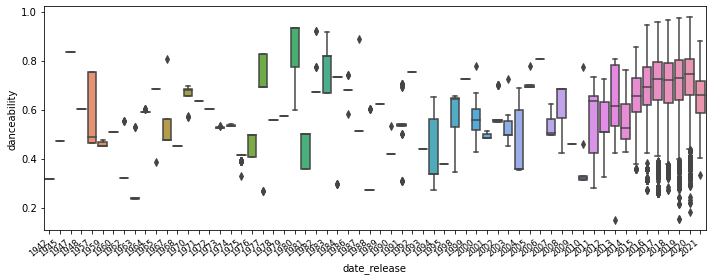

In [16]:
plt.figure(figsize=(10,4)) 
ax = sns.boxplot(x=data_featured.date_release.dt.year, y=data_featured.danceability)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8.5)
plt.tight_layout()
plt.show()
ax.get_figure().savefig('ax.png')

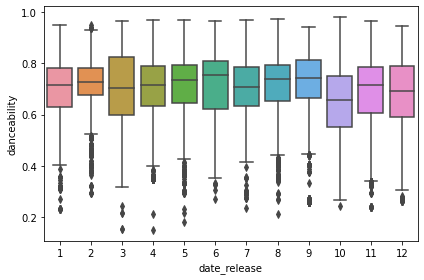

In [17]:
sns.boxplot(x=data_featured.date_release.dt.month, y=data_featured.danceability)
plt.tight_layout()
plt.savefig('month.png')

In [18]:
list_top_100 = list(data_featured.artist_name.values)

In [19]:
all_artists = []
for i in range(len(list_top_100)):
    r1 = re.compile(r"\w{1,20}.\w{1,20}", re.MULTILINE | re.DOTALL)
    r = r1.findall(list_top_100[i])
    if len(r) > 0:
        all_artists.append(r[0])

In [21]:
c = Counter(all_artists)

In [22]:
df_artists = pd.DataFrame(data = {'Name':list(c)[:30], 'Count':list(c.values())[:30]})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'The Weeknd'),
  Text(1, 0, 'The Chainsmokers'),
  Text(2, 0, 'Clean Bandit'),
  Text(3, 0, 'DJ Snake'),
  Text(4, 0, 'Maroon 5'),
  Text(5, 0, 'Rae Sremmurd'),
  Text(6, 0, 'ZAYN'),
  Text(7, 0, 'Drake'),
  Text(8, 0, 'Bruno Mars'),
  Text(9, 0, 'James Arthur'),
  Text(10, 0, 'Mariah Carey'),
  Text(11, 0, 'Major Lazer'),
  Text(12, 0, 'Sia'),
  Text(13, 0, 'Martin Garrix'),
  Text(14, 0, 'Starley'),
  Text(15, 0, 'Shakira'),
  Text(16, 0, 'Ariana Grande'),
  Text(17, 0, 'Steve Aoki'),
  Text(18, 0, 'Wham'),
  Text(19, 0, 'Hailee Steinfeld'),
  Text(20, 0, 'Migos'),
  Text(21, 0, 'Machine Gun'),
  Text(22, 0, 'Shawn Mendes'),
  Text(23, 0, 'Calvin Harris'),
  Text(24, 0, 'Twenty One'),
  Text(25, 0, 'Alessia Cara'),
  Text(26, 0, 'CNCO'),
  Text(27, 0, 'John Legend'),
  Text(28, 0, 'The Vamps'),
  Text(29, 0, 'Justin Timberlake')])

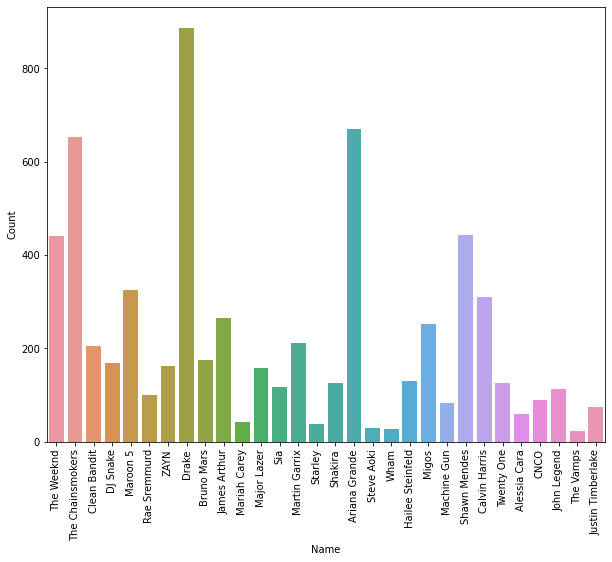

In [23]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'Name', y = 'Count', data = df_artists)
plt.xticks(rotation=90)

In [24]:
import dash
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

In [25]:
# Load Data
df = data_featured
# Build App
app = dash.Dash(external_stylesheets=[dbc.themes.LUX])
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

fig = px.scatter(df, x='year', y=df.danceability,
                 size="popularity", color="energy", hover_name="artist_name",
                 log_x=True, size_max=60, template = 'plotly_dark')

fig2 = px.scatter(df, x='year', y='valence',
                 size="Streams", color="liveness", hover_name="artist_name",
                 log_x=True, size_max=60)

fig3 = px.scatter(df, x='year', y='tempo',
                 size="energy", color="liveness", hover_name="artist_name",
                 log_x=True, size_max=60, template = 'plotly_dark')

app.layout = html.Div([
    dbc.Row([
        dbc.Col([
            dbc.NavbarSimple(
                [
                    dbc.NavItem(dbc.NavLink('Spotify Analytics', href='https://spotifycharts.com/', target='_blank'))
                ],
                    brand='Spotify'
                )
            ])
        ], no_gutters=True),
    dbc.Row([
            dbc.Col([
                dbc.Card([
                    dbc.CardBody([
                        html.H1('Top Tracks from 2017 to 2021'),
                        html.P('Audio features were provided by Spotify API. One of the most interesting ones is valence which measures so-called happiness of a track!'),
                        html.Hr(),
                     dbc.CardBody([
                                dcc.Graph(id='energy', figure=fig)
                            ]),
                    dbc.CardBody([
                            dbc.Col([
                                dcc.Graph(id='val', figure=fig2)
                            ]),
                        ]),
                        html.Br(),
                        dbc.Row([
                            dbc.Col([
                                dcc.Graph(id='country-ts', figure=fig3)
                            ])
                        ])
                ])
            ]),
            dbc.Card([
                    dbc.CardBody([
                        html.A(html.Button('View on Github!'),
    href='https://github.com/Lavriz/spotify_analytics/tree/main'),
                    ])
                ]),
            ], width=10),
        ], no_gutters=True),
])

In [ ]:
app.run_server(port=8051)

Dash is running on http://127.0.0.1:8051/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8051/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Oct/2021 11:55:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Oct/2021 11:55:14] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_1_3m1617909188.min.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Oct/2021 11:55:14] "GET /_dash-component-suites/dash_renderer/react@16.v1_9_1m1617900226.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Oct/2021 11:55:14] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_9_1m1617900226.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Oct/2021 11:55:14] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_12_2m1624274226.min.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Oct/2021 11:55:14] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_9_1m1617900226.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Oct/2021 11:55:14] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_9_1m1617900226.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 